In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA as PCA


#Leitura dos ficheiros
import os
for dirname, _, filenames in os.walk('./data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


csv_application = pd.read_csv('./data/application_record.csv')
csv_record = pd.read_csv('./data/credit_record.csv')

./data\application_record.csv
./data\credit_record.csv


In [6]:
#Tabela com todos os registos
csv_application.value_counts()


ID       CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  NAME_INCOME_TYPE      NAME_EDUCATION_TYPE            NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL  OCCUPATION_TYPE  CNT_FAM_MEMBERS
5008806  M            Y             Y                0             112500.0          Working               Secondary / secondary special  Married             House / apartment  -21474      -1134          1           0                0           0           Security staff   2.0                1
6268730  M            Y             Y                0             225000.0          Commercial associate  Secondary / secondary special  Married             House / apartment  -12339      -1889          1           0                0           0           Drivers          2.0                1
6268724  F            Y             Y                0             337500.0          Working               Secondary / s

In [7]:
print("Total de registos: " + str(len(csv_application)))

Total de registos: 438557


In [8]:
#Detetar nulls no dataset
csv_application.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

In [9]:
#remover todos os nulls e verificar se resolveu
csv_application = csv_application.dropna(how='any',axis=0)
csv_application.isnull().sum()

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
dtype: int64

In [10]:
# Transformação de valores não numéricos em valores númericos

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for x in csv_application:
    if csv_application[x].dtypes=='object':
        csv_application[x] = le.fit_transform(csv_application[x])

csv_application.head(10)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
2,5008806,1,1,1,0,112500.0,4,4,1,1,-21474,-1134,1,0,0,0,16,2.0
3,5008808,0,0,1,0,270000.0,0,4,3,1,-19110,-3051,1,0,1,1,14,1.0
4,5008809,0,0,1,0,270000.0,0,4,3,1,-19110,-3051,1,0,1,1,14,1.0
5,5008810,0,0,1,0,270000.0,0,4,3,1,-19110,-3051,1,0,1,1,14,1.0
6,5008811,0,0,1,0,270000.0,0,4,3,1,-19110,-3051,1,0,1,1,14,1.0
10,5008815,1,1,1,0,270000.0,4,1,1,1,-16872,-769,1,1,1,1,0,2.0
11,5112956,1,1,1,0,270000.0,4,1,1,1,-16872,-769,1,1,1,1,0,2.0
12,6153651,1,1,1,0,270000.0,4,1,1,1,-16872,-769,1,1,1,1,0,2.0
13,5008819,1,1,1,0,135000.0,0,4,1,1,-17778,-1194,1,0,0,0,8,2.0
14,5008820,1,1,1,0,135000.0,0,4,1,1,-17778,-1194,1,0,0,0,8,2.0


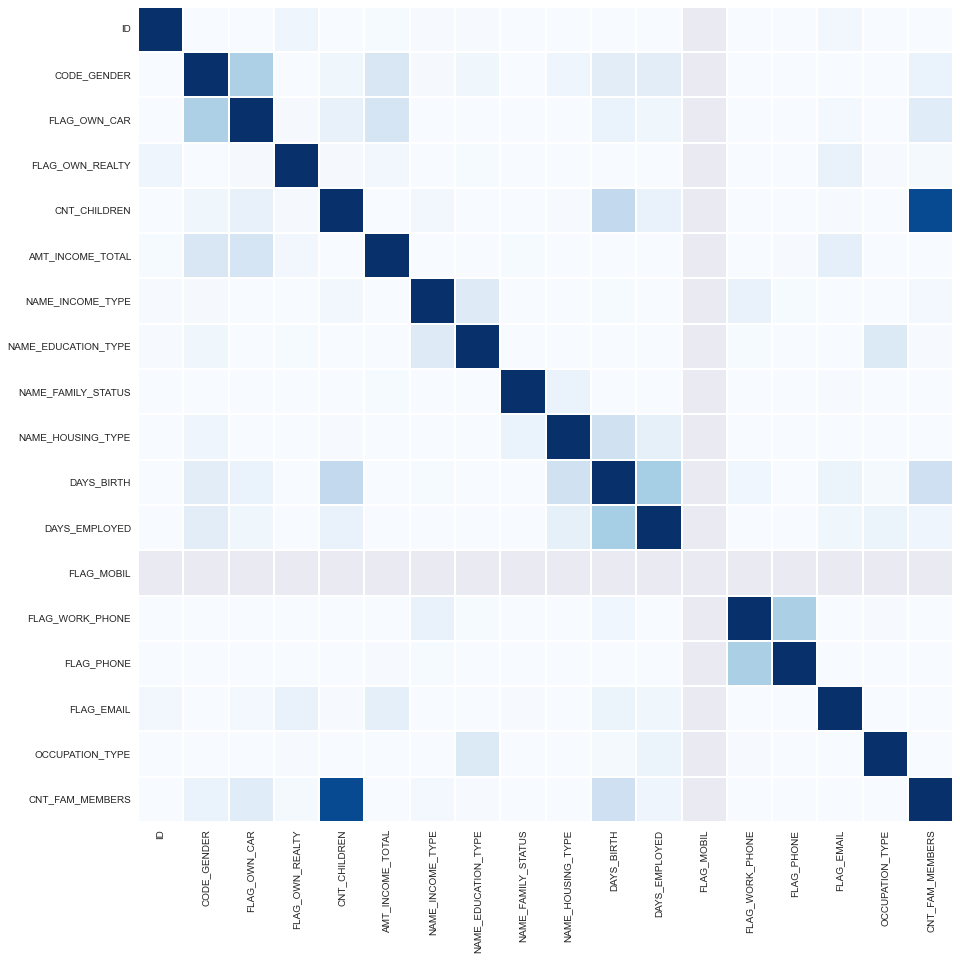

In [11]:
# Verificar correlação existente entre dados

import seaborn as sns

f, ax = plt.subplots(figsize=(15, 15))

sns.heatmap(csv_application.corr(), cbar=0, linewidths=2,vmax=1, vmin=0, square=True, cmap='Blues')
plt.show()

<AxesSubplot:xlabel='ID', ylabel='FLAG_PHONE'>

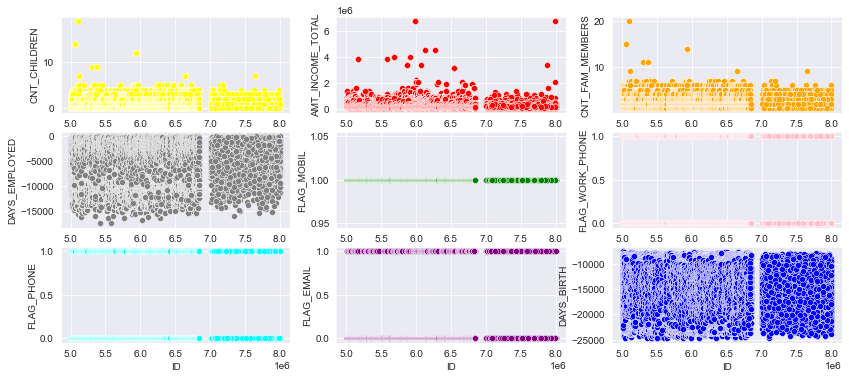

In [12]:
#Analisar possíveis discrepâncias nos dados que possam afetar o claustering

fig, ax= plt.subplots(nrows= 3, ncols = 3, figsize= (14,6))

sns.scatterplot(x='ID', y='AMT_INCOME_TOTAL', data=csv_application, ax=ax[0][1], color='red')
sns.scatterplot(x='ID', y='CNT_CHILDREN', data=csv_application, ax=ax[0][0], color= 'yellow')
sns.scatterplot(x='ID', y='CNT_FAM_MEMBERS', data=csv_application, ax=ax[0][2], color= 'orange')
sns.scatterplot(x='ID', y='DAYS_BIRTH', data=csv_application, ax=ax[2][2], color= 'blue')
sns.scatterplot(x='ID', y='DAYS_EMPLOYED', data=csv_application, ax=ax[1][0], color= 'grey')
sns.scatterplot(x='ID', y='FLAG_WORK_PHONE', data=csv_application, ax=ax[1][2], color= 'pink')
sns.scatterplot(x='ID', y='FLAG_MOBIL', data=csv_application, ax=ax[1][1], color= 'green')
sns.scatterplot(x='ID', y='FLAG_EMAIL', data=csv_application, ax=ax[2][1], color= 'purple')
sns.scatterplot(x='ID', y='FLAG_PHONE', data=csv_application, ax=ax[2][0], color= 'aqua')

In [13]:
# Eliminar dados dispares em 'CNT-CHILDREN'

q_hi = csv_application['CNT_CHILDREN'].quantile(0.999)
q_low = csv_application['CNT_CHILDREN'].quantile(0.001)
csv_application = csv_application[(csv_application['CNT_CHILDREN']>q_low) & (csv_application['CNT_CHILDREN']<q_hi)]

In [14]:
# Eliminar dados dispares em 'AMT_INCOME_TOTAL'

q_hi = csv_application['AMT_INCOME_TOTAL'].quantile(0.999)
q_low = csv_application['AMT_INCOME_TOTAL'].quantile(0.001)
csv_application= csv_application[(csv_application['AMT_INCOME_TOTAL']>q_low) & (csv_application['AMT_INCOME_TOTAL']<q_hi)]

In [15]:
# Eliminar dados díspares em 'CNT_FAM_MEMBERS'

q_hi = csv_application['CNT_FAM_MEMBERS'].quantile(0.999)
q_low = csv_application['CNT_FAM_MEMBERS'].quantile(0.001)
csv_application= csv_application[(csv_application['CNT_FAM_MEMBERS']>q_low) & (csv_application['CNT_FAM_MEMBERS']<q_hi)]

<AxesSubplot:xlabel='ID', ylabel='CNT_FAM_MEMBERS'>

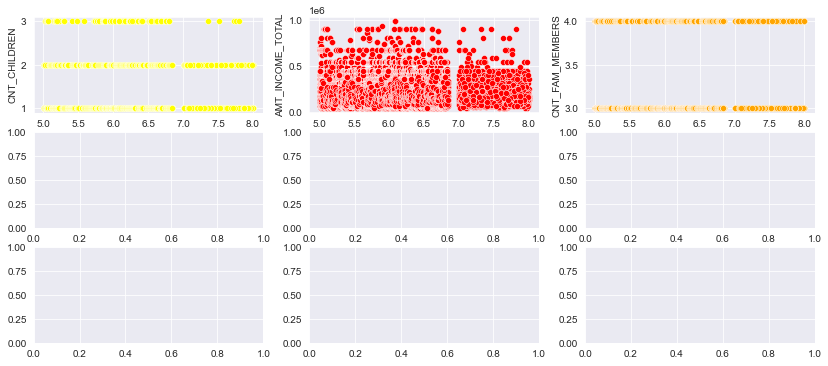

In [16]:
#Voltar a analisar os dados e verificar se foi efetuada a correção

fig, ax= plt.subplots(nrows= 3, ncols = 3, figsize= (14,6))

sns.scatterplot(x='ID', y='AMT_INCOME_TOTAL', data=csv_application, ax=ax[0][1], color='red')
sns.scatterplot(x='ID', y='CNT_CHILDREN', data=csv_application, ax=ax[0][0], color= 'yellow')
sns.scatterplot(x='ID', y='CNT_FAM_MEMBERS', data=csv_application, ax=ax[0][2], color= 'orange')

In [17]:
#No csv de emprestimos criar coluna com meses positivos

csv_record['Months from today'] = csv_record['MONTHS_BALANCE']*-1
csv_record = csv_record.sort_values(['ID','Months from today'], ascending=True)
csv_record.head(10)

,ID,MONTHS_BALANCE,STATUS,Months from today
0,5001711,0,X,0
1,5001711,-1,0,1
2,5001711,-2,0,2
3,5001711,-3,0,3
4,5001712,0,C,0
5,5001712,-1,C,1
6,5001712,-2,C,2
7,5001712,-3,C,3
8,5001712,-4,C,4
9,5001712,-5,C,5


In [18]:
# Verificar valores existentes em Status de emprestimos

csv_record['STATUS'].value_counts()


C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: STATUS, dtype: int64

In [19]:
# Fazer substituições para aparecer apenas 0 => regularizado e 1 => em falta

csv_record['STATUS'].replace({'C': 0, 'X' : 0}, inplace=True)
csv_record['STATUS'] = csv_record['STATUS'].astype('int')
csv_record['STATUS'] = csv_record['STATUS'].apply(lambda x:1 if x >= 2 else 0)

csv_record['STATUS'].value_counts(normalize=True)


0    0.99704
1    0.00296
Name: STATUS, dtype: float64

In [20]:
# Reset em ID para resolver problema

recordord = csv_record.groupby('ID').agg(max).reset_index()
recordord.head()

,ID,MONTHS_BALANCE,STATUS,Months from today
0,5001711,0,0,3
1,5001712,0,0,18
2,5001713,0,0,21
3,5001714,0,0,14
4,5001715,0,0,59


In [21]:
# Juntar dados dos 2 datasets

df = csv_application.join(recordord.set_index('ID'), on='ID', how='inner')
df.drop(['Months from today', 'MONTHS_BALANCE'], axis=1, inplace=True)
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS
29,5008838,1,0,1,1,405000.0,0,1,1,1,-11842,-2016,1,0,0,0,10,3.0,0
30,5008839,1,0,1,1,405000.0,0,1,1,1,-11842,-2016,1,0,0,0,10,3.0,0
31,5008840,1,0,1,1,405000.0,0,1,1,1,-11842,-2016,1,0,0,0,10,3.0,0
32,5008841,1,0,1,1,405000.0,0,1,1,1,-11842,-2016,1,0,0,0,10,3.0,0
33,5008842,1,0,1,1,405000.0,0,1,1,1,-11842,-2016,1,0,0,0,10,3.0,0


In [22]:
#Dividir dados

from sklearn.model_selection import train_test_split

X = df.iloc[:,1:-1]
y = df.iloc[:,-1]


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4)

In [24]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_scaled = pd.DataFrame(ss.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(ss.transform(X_test), columns=X_test.columns)

In [25]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_balanced, y_balanced = oversample.fit_resample(X_scaled, y_train)
X_test_balanced, y_test_balanced = oversample.fit_resample(X_test_scaled, y_test)

In [26]:
# Usar PCA para Técnica de Aprendizagem não supervisionada utilizada para reduzir a dimensionalidade dos dados.
# Transformam-se todas as variáveis (colunas) em 2 componentes principais.

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_balanced)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2']).values

In [27]:
principalDf = pd.DataFrame(principalDf)

finalDf = pd.concat([principalDf, y_balanced], axis = 1).values

finalDf


array([[ 0.69262326, -2.10763706,  0.        ],
       [-0.5847904 , -1.19861408,  0.        ],
       [ 0.01231504, -1.48131139,  0.        ],
       ...,
       [ 0.04076589, -0.63581573,  1.        ],
       [ 1.53208584, -0.363922  ,  1.        ],
       [-1.82921938, -0.99369238,  1.        ]])

In [28]:
# Obtenção do número ideal de Clusters através do KMeans

from sklearn.cluster import KMeans
wcss=[]


for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(finalDf)
    wcss.append(kmeans.inertia_)


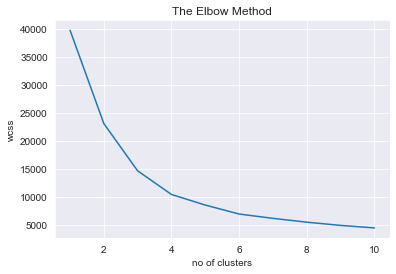

In [29]:
#Gráfico de elbow

plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [30]:
kmeansmodel = KMeans(n_clusters= 4, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(finalDf)

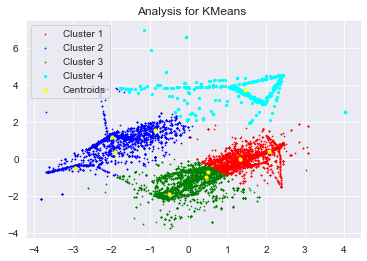

In [31]:
plt.scatter(finalDf[y_kmeans == 0, 0], finalDf[y_kmeans == 0, 1], s = 0.5, c = 'red', label = 'Cluster 1')
plt.scatter(finalDf[y_kmeans == 1, 0], finalDf[y_kmeans == 1, 1], s = 0.5, c = 'blue', label = 'Cluster 2')
plt.scatter(finalDf[y_kmeans == 2, 0], finalDf[y_kmeans == 2, 1], s = 0.5, c = 'green', label = 'Cluster 3')
plt.scatter(finalDf[y_kmeans == 3, 0], finalDf[y_kmeans == 3, 1], s = 5, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 10, c = 'yellow', label = 'Centroids')
plt.title('Analysis for KMeans ')
plt.legend()
plt.show()